In [44]:
## libraries ##

import os
import glob
import re
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.backends.backend_pdf import PdfPages
import time
import numpy as np
from skimage.measure import EllipseModel
import pickle
from scipy.spatial import ConvexHull
from plotnine import ggplot, aes, geom_point, geom_ellipse, coord_cartesian, theme_bw

# from plotnine import ggplot, aes, geom_point, theme_minimal

In [19]:
def timeit_decorator(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Time taken by {func.__name__}: {end_time - start_time:.4f} seconds")
        return result
    return wrapper

In [20]:
## functions for plot ##
def plot_mode_points(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.2
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['spacing'], simresult_df.iloc[0]['v_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['spacing'], simresult_df.iloc[-1]['v_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['spacing'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['v_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['spacing'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['v_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['spacing'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['v_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('spacing')
    ax.set_ylabel('v_fol')
    # ax.legend()
    # ax.show()

def plot_mode_points_x(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['x_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['x_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['x_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['x_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['x_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('x_fol')
    # ax.legend()
    # ax.show()
       
def plot_mode_points_v(ax, simresult_df):
    p_cex = 7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['v_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['v_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['v_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['v_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['v_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('v_fol')
    # ax.legend()
    # ax.show()
     
def plot_mode_points_a(ax, simresult_df):
    p_cex = 0.7
    p_alpha = 0.5
    p_pch = 20

    # Convert alpha for colors
    red_color = mcolors.to_rgba("#FA7268", alpha=p_alpha)
    blue_color = mcolors.to_rgba("#0080ff", alpha=p_alpha)
    green_color = mcolors.to_rgba("#009900", alpha=p_alpha)

    # Plot the first point
    ax.scatter(simresult_df.iloc[0]['time'], simresult_df.iloc[0]['acc_fol'], 
                color='black', s=10, marker='o')

    # Plot the last point
    ax.scatter(simresult_df.iloc[-1]['time'], simresult_df.iloc[-1]['acc_fol'], 
                color='black', s=10, marker='^')

    # Plot points where Fol.a >= 0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] >= 0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] >= 0.3048]['acc_fol'], 
                color='red', s=p_cex, marker='o')

    # Plot points where Fol.a <= -0.3048
    ax.scatter(simresult_df[simresult_df['acc_fol'] <= -0.3048]['time'], 
                simresult_df[simresult_df['acc_fol'] <= -0.3048]['acc_fol'], 
                color='blue', s=p_cex, marker='o')

    # Plot points where -0.3048 < Fol.a < 0.3048
    ax.scatter(simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['time'], 
                simresult_df[(simresult_df['acc_fol'] > -0.3048) & 
                             (simresult_df['acc_fol'] < 0.3048)]['acc_fol'], 
                color='green', s=p_cex, marker='o')

    # Show plot
    ax.set_xlabel('Time')
    ax.set_ylabel('acc_fol')
    # ax.legend()
    # ax.show()
    
def generate_plots(LFdata, pairID_fin, sig1):
    # Ensure the output directory exists
    output_dir = os.path.join(os.getcwd(), "SS_pneuma_new")
    os.makedirs(output_dir, exist_ok=True)

    # Loop through each pair in pairID_fin
    for i, (index, row) in enumerate(pairID_fin.iterrows()):
        leaderID = row['veh_id_pre']
        followerID = row['veh_id_fol']

        # Filter data for the current pair
        temp = LFdata[(LFdata['veh_id_fol'] == followerID) & (LFdata['veh_id_pre'] == leaderID)]
        if temp.empty:
            continue  # Skip if no data for this pair

        temp = temp.sort_values(by='time')
        time_range = temp['time'].max() - temp['time'].min()

        if time_range > 30:
            # Create a new PDF file for plotting
            pdf_path = os.path.join(output_dir, f"Traj_c_{i}_{leaderID}_{followerID}.pdf")

            with PdfPages(pdf_path) as pdf:
                # Define plot properties
                plot_params = {
                    'linewidth': 1.5,
                }

                # Plot for Fol.Loc vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['x_fol'], linestyle='-', **plot_params)
                ax.set_ylim(50, 320)
                ax.grid(linewidth=1.5)
                plot_mode_points_x(ax, temp)
                ax.plot(temp['time'], temp['x_pre'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Fol.V vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_ylim(0, 100)
                ax.grid(linewidth=1.5)
                plot_mode_points_v(ax, temp)
                ax.plot(temp['time'], temp['v_fol'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Fol.a vs Time
                fig, ax = plt.subplots()
                ax.plot(temp['time'], temp['acc_fol'], linestyle='-', **plot_params)
                ax.set_ylim(-8, 8)
                ax.grid(linewidth=1.5)
                plot_mode_points_a(ax, temp)
                ax.plot(temp['time'], temp['acc_fol'], linestyle='--', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Spacing vs Fol.V (full range)
                fig, ax = plt.subplots()
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_xlim(0, 200)
                ax.set_ylim(0, 100)
                ax.grid(linewidth=1.5)
                plot_mode_points(ax, temp)
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Plot for Spacing vs Fol.V (zoomed range)
                fig, ax = plt.subplots()
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                ax.set_xlim(0, 50)
                ax.set_ylim(0, 60)
                ax.grid(linewidth=1.5)
                plot_mode_points(ax, temp)
                ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                pdf.savefig(fig)
                plt.close(fig)

                # Additional plot if specific condition is met
                if ((temp['signal_fol'] == 1) & (temp['signal_pre'] == 2)).any():
                    temp.loc[temp['signal_fol'] == 1, 'spacing'] = sig1 - temp['x_fol']
                    temp.loc[temp['time'] < 112, 'spacing'] = sig1 - temp['x_fol']
                    fig, ax = plt.subplots()
                    ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                    ax.set_xlim(-100, 200)
                    ax.set_ylim(0, 100)
                    ax.grid(linewidth=1.5)
                    plot_mode_points(ax, temp)
                    ax.plot(temp['spacing'], temp['v_fol'], linestyle='-', **plot_params)
                    pdf.savefig(fig)
                    plt.close(fig)
                    


In [21]:
## Data Import ##

current_folder = os.getcwd()
datadir = f"{current_folder}\\Data\\D8"
folder1 = f"{datadir}\\20181024\\0930_1000"
folder2 = f"{datadir}\\20181029\\1000_1030"

# Function to list all .csv files in subdirectories
def list_csv_files(folder):
    subdirs = [os.path.join(folder, d) for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    csv_files = []
    for subdir in subdirs:
        csv_files.extend(glob.glob(os.path.join(subdir, "*.csv")))
    return csv_files

# Get CSV files from both folders
csv_files_folder1 = list_csv_files(folder1)
csv_files_folder2 = list_csv_files(folder2)

# Combine results from both folders
all_csv_files = csv_files_folder1 + csv_files_folder2


In [22]:
all_csv_files

['e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\L\\20181024_D8_0930_1000_L.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\M\\20181024_D8_0930_1000_M.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181024\\0930_1000\\R\\20181024_D8_0930_1000_R.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\L\\20181029_D8_1000_1030_L.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\M\\20181029_D8_1000_1030_M.csv',
 'e:\\Dropbox\\STSlab\\0.논문작업\\urbanCoasting\\Data\\D8\\20181029\\1000_1030\\R\\20181029_D8_1000_1030_R.csv']

In [23]:
def extract_attributes_from_filename(filename):
    # Extract base filename without path and extension
    base_name = os.path.basename(filename).replace('.csv', '')
    
    # Regular expression to extract date, time, and lane
    match = re.match(r'(\d{8})_D\d+_(\d{4})_(\d{4})_([A-Z])', base_name)
    if match:
        date, time_start, _, lane = match.groups()
        return {
            'date': date,
            'time_start': time_start,
            'lane': lane
        }
    return {'date': 'Unknown', 'time_start': 'Unknown', 'lane': 'Unknown'}




In [24]:
# Read all CSV files into a list of DataFrames with attributes
dataframes_with_attrs = []
for file in all_csv_files:
    df = pd.read_csv(file)
    attrs = extract_attributes_from_filename(file)
    df['date'] = attrs['date']
    df['time_start'] = attrs['time_start']
    df['lane'] = attrs['lane']
    df.drop(columns=['Unnamed: 0'], inplace=True)
    if 'ordering' in df.columns:
        print(f"Removing ordering column from {file}")
        df.drop(columns=['ordering'], inplace=True)
    # print(df.head())
    df.drop_duplicates(inplace=True)
    dataframes_with_attrs.append(df)

Removing ordering column from e:\Dropbox\STSlab\0.논문작업\urbanCoasting\Data\D8\20181024\0930_1000\L\20181024_D8_0930_1000_L.csv
Removing ordering column from e:\Dropbox\STSlab\0.논문작업\urbanCoasting\Data\D8\20181024\0930_1000\R\20181024_D8_0930_1000_R.csv


In [25]:
# Change veh_id and position 
for df in dataframes_with_attrs:
    df['veh_id'] = df['track_id'].astype(str) + df['type']
    df['x'] = - df['x'] + df['x'].max()
    # print(df.head())  # Print the first few rows of each DataFrame

In [26]:
def find_pre_veh(df):
    # Sort the dataframe by 'time' and 'x' in descending order
    df = df.sort_values(by=['time', 'x'], ascending=[True, False]).copy()

    # Create the 'pre_veh' column
    df['pre_veh'] = df.groupby('time')['veh_id'].shift(1, fill_value=-1)
    
    # Create the 'spacing' column
    df['spacing'] = df.groupby('time')['x'].diff(-1).shift(1, fill_value=9999).fillna(9999)
    
    # Set spacing to 9999 where there's only one vehicle at a timestep
    single_vehicle_mask = df.groupby('time')['veh_id'].transform('count') == 1
    df.loc[single_vehicle_mask, 'spacing'] = 9999

    df = df.sort_values(by=['track_id', 'time'], ascending=[True, True]).copy()
    
    return df



In [27]:
for i in range(len(dataframes_with_attrs)):
    dataframes_with_attrs[i] = find_pre_veh(dataframes_with_attrs[i])
    if (dataframes_with_attrs[i]['veh_id'] == dataframes_with_attrs[i]['pre_veh']).any():
        matching_rows = dataframes_with_attrs[i][dataframes_with_attrs[i]['veh_id'] == dataframes_with_attrs[i]['pre_veh']]
        print(f"Pre-vehicle found in {i}: {dataframes_with_attrs[i].loc[matching_rows.index,'veh_id']}")
    # print(dataframes_with_attrs[i].head())

In [28]:
def generate_lfdata(new_df, sig1):
    new_df = new_df[['time', 'veh_id', 'pre_veh', 'x', 'speed_new', 'lon_acc_new', 'spacing']].copy()
    new_df.columns = ['time', 'veh_id', 'pre_veh', 'x', 'v', 'acc', 'spacing']
    
    # Get unique vehicle pairs (veh_id, pre_veh) excluding pre_veh == -1
    pairID = new_df[['veh_id', 'pre_veh']].drop_duplicates()
    pairID = pairID[pairID['pre_veh'] != -1]

    # Merge the DataFrame with itself to align followers and leaders
    merged_df = pd.merge(new_df, new_df, left_on=['time', 'pre_veh'], right_on=['time', 'veh_id'],
                         suffixes=('_fol', '_pre'))
    
    # Group by the vehicle pairs (veh_id_fol, veh_id_pre)
    grouped = merged_df.groupby(['veh_id_fol', 'veh_id_pre'])
    
    # Define a list to hold the valid groups
    valid_groups = []
    
    for (veh_id_fol, veh_id_pre), group in grouped:
        # Calculate the time overlap
        time_min = group['time'].min()
        time_max = group['time'].max()

        # Check if the time overlap is more than 30
        if time_max - time_min > 30:
            valid_groups.append(group)

    valid_df = pd.concat(valid_groups)
    
    # Remove unnecessary columns
    LFdata = valid_df.drop(columns = ['pre_veh_pre', 'spacing_pre', 'pre_veh_fol'])
    LFdata = LFdata.rename(columns={'spacing_fol': 'spacing'})
        
    # Determine follower state
    LFdata['state_fol'] = 'coa'
    LFdata.loc[LFdata['acc_fol'] > 0.3048, 'state_fol'] = 'acc'
    LFdata.loc[LFdata['acc_fol'] < -0.3048, 'state_fol'] = 'dec'

    # Signal assignments
    LFdata['signal_fol'] = np.where(LFdata['x_fol'] < sig1, 1, 2)
    LFdata['signal_pre'] = np.where(LFdata['x_pre'] < sig1, 1, 2)

    # Get unique final pairs of follower and leader vehicle IDs
    pairID_fin = LFdata[['veh_id_fol', 'veh_id_pre']].drop_duplicates()

    return LFdata, pairID_fin


In [29]:
sig1 = 105

all_LFdata = []
all_pairID_fin = []

# Loop through each DataFrame in dataframes_with_attrs
for df in dataframes_with_attrs:
    # Apply the generate_lfdata function to each DataFrame
    LFdata, pairID_fin = generate_lfdata(df, sig1)
    
    # Store the results in the respective lists
    all_LFdata.append(LFdata)
    all_pairID_fin.append(pairID_fin)

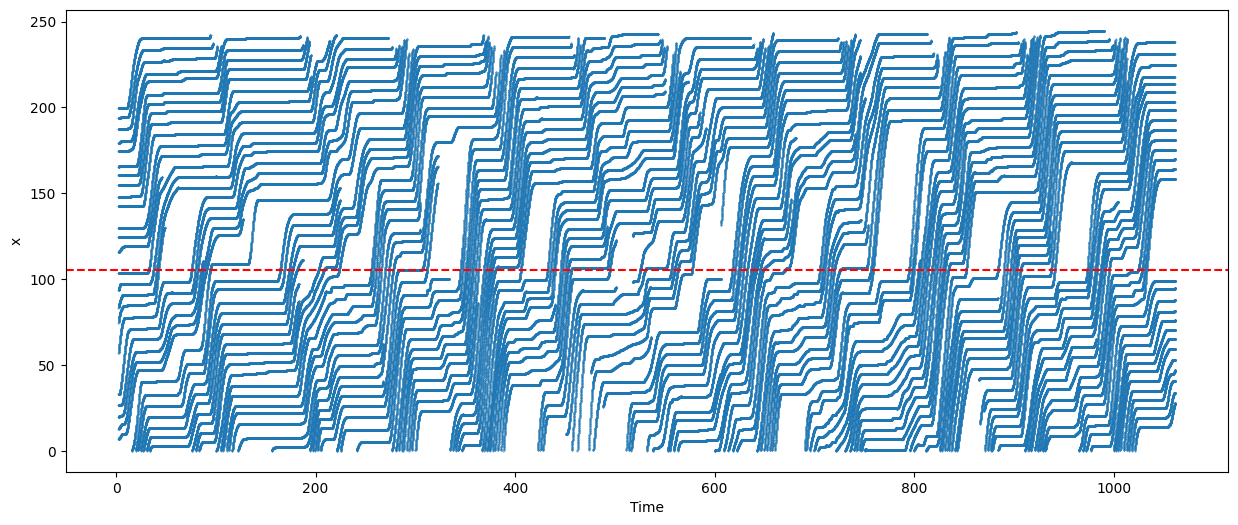

In [30]:
df = all_LFdata[0]
plt.figure(figsize=(15, 6))
plt.scatter(df['time'], df['x_fol'], s=.1)
plt.xlabel('Time')
plt.ylabel('x')
plt.axhline(y=105, color='r', linestyle='--')
plt.show()


In [ ]:
generate_plots(all_LFdata[0], all_pairID_fin[0], sig1)

In [31]:
def substr_right(x, n):
    """
    Extracts the rightmost `n` characters from the string `x`.

    Parameters:
    x (str): The input string.
    n (int): The number of characters to extract from the right end.

    Returns:
    str: The rightmost `n` characters of the input string.
    """
    return x[-n:] if len(x) >= n else x


def flag_incomplete_loop(temp, temp_rle):
    long_accdec = temp_rle[temp_rle['loop'] == -1].index
    
    if len(long_accdec) > 0:
        for j in long_accdec:
            if temp_rle.loc[j, 'values'] == 'acc':
                start_row = temp_rle.loc[j, 'start']
                end_row = start_row + 99

                if j > 0 and temp_rle.loc[j - 1, 'values'] == 'coa' and temp_rle.loc[j - 1, 'speed_max'] < 5:
                    coa_start = temp_rle.loc[j - 1, 'start']
                    coa_end = temp_rle.loc[j - 1, 'end']
                    temp.loc[coa_start:coa_end, 'importantCoasting'] = 1

            else:
                start_row = temp_rle.loc[j, 'end'] - 99
                end_row = temp_rle.loc[j, 'end']

                if j < len(temp_rle) - 1 and temp_rle.loc[j + 1, 'values'] == 'coa' and temp_rle.loc[j + 1, 'speed_max'] < 5:
                    coa_start = temp_rle.loc[j + 1, 'start']
                    coa_end = temp_rle.loc[j + 1, 'end']
                    temp.loc[coa_start:coa_end, 'importantCoasting'] = 1

            temp.loc[start_row:end_row, 'loop'] = -j
            temp.loc[start_row:end_row, 'line'] = -j

    return temp


def divide_loop_for_line(temp_rle):
    # Identify coasting stops (start points of the loop)
    coa_stop = temp_rle[temp_rle['loop'].astype(str).str.startswith('1')].index
    
    if len(coa_stop) > 1:
        for l in range(len(coa_stop) - 1):
            start_coa = coa_stop[l]
            end_coa = coa_stop[l + 1]
            
            # Check conditions: 1) Presence of both 'acc' and 'dec', 2) Maximum speed greater than 5
            cond1 = np.prod(np.isin(['acc', 'dec'], temp_rle.loc[start_coa:end_coa, 'values'].unique()))
            cond2 = temp_rle.loc[start_coa:end_coa, 'speed_max'].max()
            
            if cond1 == 1 and cond2 > 5:
                # Find intermediate 'coa' values between start and end of the loop
                tmp_which_coa = temp_rle[(temp_rle['values'] == 'coa') & 
                                         (temp_rle.index > start_coa) & 
                                         (temp_rle.index < end_coa)].index
                
                if not tmp_which_coa.empty:
                    tmp_cand = temp_rle.loc[tmp_which_coa]
                    max_coa = tmp_cand['speed_max'].idxmax()
                    temp_rle.at[max_coa, 'loop'] = 3
    
    return temp_rle


def flag_complete_loop_for_line(temp, temp_rle):
    coa_stop = temp_rle[temp_rle['loop'].astype(str).str.startswith('1')].index
    coa_peak = temp_rle[temp_rle['loop'] == 3].index

    if len(coa_stop) > 1:
        for j in range(len(coa_stop) - 1):
            coa_start = temp_rle.loc[coa_stop[j], 'start']
            within_range = temp_rle.loc[coa_stop[j]:coa_stop[j+1], 'loop']

            # Set default coa_end to the end of the current loop segment
            coa_end = temp_rle.loc[coa_stop[j], 'end']
            
            if any(within_range == 2):
                coa_end = temp_rle.loc[coa_stop[j+1], 'end']
            else:
                start_row = coa_end + 1
                tmp_peak = coa_peak[(coa_peak > coa_stop[j]) & (coa_peak < coa_stop[j+1])]
                
                if len(tmp_peak) > 0:
                    end_row = temp_rle.loc[tmp_peak, 'start'].iloc[0] - 1
                elif (temp_rle.loc[coa_stop[j+1], 'values'] == 'coa' and 
                      temp_rle.loc[coa_stop[j+1], 'speed_max'] < 5):
                    end_row = temp_rle.loc[coa_stop[j+1], 'start'] - 1
                    coa_start2 = temp_rle.loc[coa_stop[j+1], 'start']
                    coa_end2 = temp_rle.loc[coa_stop[j+1], 'end']
                    temp.loc[coa_start2:coa_end2, 'importantCoasting'] = 1
                else:
                    end_row = temp_rle.loc[coa_stop[j+1], 'end']
                
                # Ensure start_row and end_row are integers
                start_row, end_row = int(start_row), int(end_row)
                
                # Apply line flag based on conditions
                if (temp.loc[start_row:end_row, 'spacing'].min() > 0 and
                    temp.loc[start_row:end_row, 'spacing'].max() < 100 and
                    end_row - start_row > 80):
                    temp.loc[start_row:end_row, 'line'] = j * 2 - 1

                # Apply additional line flag for peaks
                if len(tmp_peak) > 0:
                    start_row = temp_rle.loc[tmp_peak, 'end'].iloc[0] + 1
                    if temp_rle.loc[coa_stop[j+1], 'values'] == 'coa':
                        end_row = temp_rle.loc[coa_stop[j+1], 'start'] - 1
                    else:
                        end_row = temp_rle.loc[coa_stop[j+1], 'end']
                    
                    # Ensure start_row and end_row are integers
                    start_row, end_row = int(start_row), int(end_row)
                    
                    if (temp.loc[start_row:end_row, 'spacing'].min() > 0 and
                        temp.loc[start_row:end_row, 'spacing'].max() < 100 and
                        end_row - start_row > 80):
                        temp.loc[start_row:end_row, 'line'] = j * 2

    return temp


def detect_loop(temp, temp_rle):
    ## temp.rle flag ##
    ## 0: nothing
    ## -1: incomplete loop
    ## 1: start point of the loop
    ## 2: important stop
    ## 3: peak
    ## 10: end point of the loop
    ## 11: both end and start point of the loop
    
    # Aggregations for max and min values
    agg_max = temp.groupby('group').max()
    agg_min = temp.groupby('group').min()
    
    # Assign the max and min values to temp_rle
    temp_rle['speed_max'] = agg_max['v_fol'].values
    temp_rle['speed_min'] = agg_min['v_fol'].values
    temp_rle['spacing_max'] = agg_max['spacing'].values
    temp_rle['spacing_min'] = agg_min['spacing'].values
    
    # Initialize loop column
    temp_rle['loop'] = 0
    
    # Identify long deceleration and acceleration phases
    ## long deceleration
    long_dec = temp_rle[(temp_rle['values'] == 'dec') & 
                        (temp_rle['lengths'] > 100) & 
                        (temp_rle['speed_max'] > 10) & 
                        (temp_rle['speed_min'] < 5)].index
    ## long acceleration
    long_acc = temp_rle[(temp_rle['values'] == 'acc') & 
                        (temp_rle['lengths'] > 100) & 
                        (temp_rle['speed_max'] > 10) & 
                        (temp_rle['speed_min'] < 5)].index
    ## coasting states with speed_max < 5 (start or end of loop)
    coa_stop = temp_rle[(temp_rle['values'] == 'coa') & 
                        (temp_rle['speed_max'] < 5)].index
    
    # Mark incomplete loops
    if len(long_dec) > 0:
        temp_rle.loc[long_dec, 'loop'] = -1
    if len(long_acc) > 0:
        temp_rle.loc[long_acc, 'loop'] = -1
    
    # Start loop detection logic
    if len(coa_stop) > 0:
        ## indicate the candidate loop start and end
        temp_rle.loc[coa_stop, 'loop'] = 1
        
        j = 0
        while j < len(coa_stop) - 1:
            start_coa = coa_stop[j]
            end_coa = coa_stop[j + 1]
            
            cond1 = np.prod(np.isin(['acc', 'dec'], temp_rle.loc[start_coa:end_coa, 'values'].unique())) # 1: loop should include acc and dec phases
            cond2 = temp_rle.loc[start_coa:end_coa, 'speed_max'].max() # 2: max speed should be greater than certain value (filter oscillation)
            cond3 = temp_rle.loc[start_coa:end_coa, 'spacing_max'].max() # 3: max spacing should be less than certain value (filter non car-following state)
            
            if len(coa_stop) > 0:
                ## No leader vehicle exists (First vehicle of platoon at signal)
                if cond1 == 1 and cond3 > 50:
                    temp_rle.loc[[start_coa, end_coa - 1], 'loop'] = 0 # flag as non-loop
                    # if j > 0:
                    #     print("here")
                    #     temp_rle.at[start_coa, 'loop'] = 10 # if previous loop exists, flag as end of loop (1: end of loop, 0: no loop start) -> remove
                    coa_stop = temp_rle[temp_rle['loop'].astype(str).str.startswith('1')].index
                else:
                    ## 1. no loop, or 2. oscillation 
                    if cond1 == 0 or cond2 < 3:
                        if temp_rle.at[start_coa, 'lengths'] < 500:
                            if j > 0: 
                                if substr_right(str(temp_rle.at[coa_stop[j - 1], 'loop']), 1) == '1': # if previous loop exists, flag as end of loop
                                    temp_rle.at[start_coa, 'loop'] = 10
                                    j += 1
                                else:
                                    temp_rle.at[start_coa, 'loop'] = 0
                            else:
                                temp_rle.at[start_coa, 'loop'] = 0
                                
                        ## where temp.rle[start.coa,]$lengths >= 500, flag it as important stop (probably signal related or queue)
                        else:
                            if temp_rle.at[end_coa, 'lengths'] > 500:
                                temp_rle.loc[start_coa + 1:end_coa - 1, 'loop'] = 2
                                j += 1
                            else:
                                temp_rle.at[end_coa, 'loop'] = 0
                        coa_stop = temp_rle[temp_rle['loop'].astype(str).str.startswith('1')].index
                    
                    ## apparent loop
                    else:
                        temp_rle.loc[start_coa + 1:end_coa - 1, 'loop'] = 0 # no loop inside the loop
                        if temp_rle.at[start_coa, 'loop'] == 10: # if previous loop exists, flag both start and end of loop
                            temp_rle.at[start_coa, 'loop'] = 11
                        if temp_rle.at[end_coa, 'loop'] in [-1, 1]: # flag as end of loop
                            temp_rle.at[end_coa, 'loop'] = 10
                        j += 1 # move to the next loop
        
        if j == len(coa_stop) - 1:
            start_coa = coa_stop[j]
            end_coa = len(temp_rle) - 1
            
            cond1 = np.prod(np.isin(['acc', 'dec'], temp_rle.loc[start_coa:end_coa, 'values'].unique()))
            cond2 = temp_rle.loc[start_coa:end_coa, 'speed_max'].max()
            cond3 = temp_rle.at[end_coa, 'speed_max'] < 5
            
            if cond1 == 1 and cond2 > 5 and cond3:
                temp_rle.loc[start_coa + 1:end_coa, 'loop'] = 0
                temp_rle.at[end_coa, 'loop'] = 10
            else:
                if j == 0:
                    temp_rle.at[start_coa, 'loop'] = 0
                else:
                    if substr_right(str(temp_rle.at[start_coa, 'loop']), 1) == '1':
                        temp_rle.at[start_coa, 'loop'] = 0

    return temp_rle


def make_rle(temp):
    # Create the initial RLE (Run-Length Encoding) data frame
    temp['rle'] = (temp['state_fol'] != temp['state_fol'].shift()).cumsum()
    rle_df = temp.groupby('rle')['state_fol'].agg(['first', 'size']).reset_index()
    rle_df.columns = ['rle', 'values', 'lengths']
    
    # Condition to modify short non-'coa' segments
    cond = (rle_df['values'] != 'coa') & (rle_df['lengths'] < 25)
    rle_df.loc[cond, 'values'] = 'coa'
    
    # Recompute RLE after modification
    rle_df['rle'] = (rle_df['values'] != rle_df['values'].shift()).cumsum()
    rle_df = rle_df.groupby('rle').agg({
        'values': 'first',
        'lengths': 'sum'
    }).reset_index()
    
    # Compute the start and end indices
    rle_df['end'] = rle_df['lengths'].cumsum() - 1
    rle_df['start'] = rle_df['end'].shift(1).fillna(-1).astype(int) + 1
    
    return rle_df


def flag_complete_loop(temp, temp_rle):
    # Find indices where loop starts with '1' (indicating a loop start)
    coa_stop = temp_rle[temp_rle['loop'].astype(str).str.startswith('1')].index
    
    if len(coa_stop) > 1:
        for j in range(len(coa_stop) - 1):
            coa_start = temp_rle.loc[coa_stop[j], 'start']
            within_range = temp_rle.loc[coa_stop[j]:coa_stop[j+1], 'loop']
            
            # Check if there are any '2' values within the range
            if any(within_range == 2):
                coa_end = temp_rle.loc[coa_stop[j+1], 'end']
            else:
                coa_end = temp_rle.loc[coa_stop[j], 'end']
            start_row = coa_end + 1
            if (temp_rle.loc[coa_stop[j+1], 'values'] == 'coa' and 
                temp_rle.loc[coa_stop[j+1], 'speed_max'] < 5):
                end_row = temp_rle.loc[coa_stop[j+1], 'start'] - 1
                coa_start2 = temp_rle.loc[coa_stop[j+1], 'start']
                coa_end2 = temp_rle.loc[coa_stop[j+1], 'end']
                temp.loc[coa_start2:coa_end2, 'importantCoasting'] = 1
            else:
                end_row = temp_rle.loc[coa_stop[j+1], 'end']
        
            # Ensure start_row and end_row are integers
            start_row, end_row = int(start_row), int(end_row)
            
            # Check conditions and update loop and important coasting flags
            if (temp.loc[start_row:end_row, 'spacing'].min() > 0 and
                temp.loc[start_row:end_row, 'spacing'].max() < 100 and
                end_row - start_row > 80):
                temp.loc[start_row:end_row, 'loop'] = j + 1
                temp.loc[coa_start:coa_end, 'importantCoasting'] = 1

    return temp


def optimize_loop_detection(pairID, LFdata):
    # Add necessary columns directly to LFdata to avoid multiple appends
    LFdata['loop'] = 0
    LFdata['line'] = 0
    LFdata['importantCoasting'] = 0
    LFdata['group'] = 0

    LFdata_loops = []
    
    print(f"number of pairs: {len(pairID)}")
    for i in range(len(pairID)):
        # print("pair: ", i)
        leader = pairID.iloc[i]['veh_id_pre']
        follower = pairID.iloc[i]['veh_id_fol']
        
        # Filter data for the specific pair
        temp = LFdata[(LFdata['veh_id_fol'] == follower) & (LFdata['veh_id_pre'] == leader)].copy()
        temp = temp.sort_values(by='time')
        
        # Generate RLE data
        temp_rle = make_rle(temp)
        
        # Assign group numbers based on RLE
        group_vals = np.repeat(range(1, len(temp_rle) + 1), temp_rle['lengths'])
        temp['group'] = group_vals[:len(temp)]
        
        # Detect and flag loops
        temp_loop = detect_loop(temp, temp_rle)
        temp = flag_complete_loop(temp, temp_loop)
        
        # Divide loops for line detection and flag lines
        temp_loop_line = divide_loop_for_line(temp_loop)
        temp = flag_complete_loop_for_line(temp, temp_loop_line)
        
        # Flag incomplete loops
        temp = flag_incomplete_loop(temp, temp_loop_line)
        
        # Drop the group column
        temp = temp.drop(columns=['group'])
        
        # Append processed data to list
        LFdata_loops.append(temp)

    # Combine all processed pairs into one dataframe
    LFdata_loop = pd.concat(LFdata_loops, ignore_index=True)
    
    return LFdata_loop

In [32]:
all_LFdata_loop = []

# Loop through each DataFrame in dataframes_with_attrs
for i in range(0, len(all_LFdata)):
    pairID = all_pairID_fin[i]
    LFdata = all_LFdata[i]

    optimized_LFdata_loop = optimize_loop_detection(pairID, LFdata)
    
    all_LFdata_loop.append(optimized_LFdata_loop)
    

number of pairs: 190
number of pairs: 245
number of pairs: 237
number of pairs: 134
number of pairs: 158
number of pairs: 116


In [33]:
# Save the list to a file
with open('all_LFdata_loop.pkl', 'wb') as f:
    pickle.dump(all_LFdata_loop, f)
with open('all_pairID_fin.pkl', 'wb') as f:
    pickle.dump(all_pairID_fin, f)

In [61]:
# Load the list back from the file
with open('all_LFdata_loop.pkl', 'rb') as f:
    all_LFdata_loop = pickle.load(f)
with open('all_pairID_fin.pkl', 'rb') as f: 
    all_pairID_fin = pickle.load(f)
    
print(len(all_LFdata_loop))
print(len(all_pairID_fin))

6
6


In [67]:
print(all_LFdata_loop[5]['loop'].unique())

[ 0 -5]


In [57]:
all_LFdata_loop[0].head()

,time,veh_id_fol,x_fol,v_fol,acc_fol,spacing,veh_id_pre,x_pre,v_pre,acc_pre,state_fol,signal_fol,signal_pre,loop,line,importantCoasting,rle
0,293.92,1018Car,0.086804,24.225656,-0.026042,19.114307,945Car,19.201111,24.981808,-0.823736,coa,1,1,0,0,0,1
1,293.96,1018Car,0.367032,24.222296,-0.020764,19.092606,945Car,19.459638,24.861244,-0.849972,coa,1,1,0,0,0,1
2,294.00,1018Car,0.625559,24.219676,-0.015708,19.092606,945Car,19.718165,24.737016,-0.874542,coa,1,1,0,0,0,1
3,294.04,1018Car,0.905786,24.217772,-0.010833,19.092606,945Car,19.998392,24.609376,-0.897458,coa,1,1,0,0,0,1
4,294.08,1018Car,1.164313,24.216556,-0.006264,19.092606,945Car,20.256919,24.478548,-0.918917,coa,1,1,0,0,0,1


In [163]:
all_LFdata[0].to_csv("all_LFdata.csv", index=False)
all_LFdata_loop[0].to_csv("all_LFdata_loop.csv", index=False)

In [58]:
def process_stop_info(pairID, LFdata_loop, sig1=105, sig2=300):
    """
    Processes a list of dataframes to compute stop info (signal) and update the stopID column.
    
    Args:
    - df_list (list of pd.DataFrame): List of dataframes (LFdata_loop equivalents) to process.
    - pairID (pd.DataFrame): DataFrame containing pairs of leader and follower vehicle IDs.
    - sig1 (float): Signal location 1.
    - sig2 (float): Signal location 2.
    
    Returns:
    - updated_df_list (list of pd.DataFrame): List of dataframes with updated stopID columns.
    - stop_info_df (pd.DataFrame): DataFrame containing the aggregated stop information.
    """
    stop_info = []
    stopid = 1
    
    # Initialize stopID column in each dataframe
    LFdata_loop['stop_id'] = 0
    
    # Pre-group LFdata_loop by 'Fol.Veh.ID' and 'Pre.Veh.ID' to avoid repeated filtering
    pair_groups = LFdata_loop.groupby(['veh_id_fol', 'veh_id_pre'])
    
    # Iterate through pairID DataFrame
    for i in range(len(pairID)):
        # print(f"Processing pair {i + 1} of {len(pairID)}")
        leaderID = pairID.iloc[i]['veh_id_pre']
        followerID = pairID.iloc[i]['veh_id_fol']
        
        # Check if the pair exists in the grouped data
        if (followerID, leaderID) not in pair_groups.groups:
            continue
        
        # Get the filtered and sorted data for the current follower and leader pair
        temp = pair_groups.get_group((followerID, leaderID)).sort_values(by='time').copy()
        
        # Run Length Encoding (RLE) to detect changes in `importantCoasting`
        important_coasting = temp['importantCoasting'].values
        change_points = np.flatnonzero(np.diff(important_coasting) != 0) + 1
        lengths = np.diff(np.concatenate(([0], change_points, [len(important_coasting)])))
        values = important_coasting[np.concatenate(([0], change_points))]

        # Filter only where importantCoasting == 1
        valid_indices = np.where(values == 1)[0]
        
        # Skip iteration if no relevant data
        if len(valid_indices) == 0:
            continue

        # Calculate start and end indices for each run of importantCoasting == 1
        start_rows = np.concatenate(([0], np.cumsum(lengths)[:-1]))[valid_indices]
        end_rows = np.cumsum(lengths)[valid_indices]-1
        start_end_pairs = np.column_stack((start_rows, end_rows))

        # Calculate stop info for each run
        for start, end in start_end_pairs:
            length = end - start + 1
            loc = temp.iloc[start:end]['x_fol'].mean()

            # Determine signal and distance to signal
            sig = 1 if loc <= sig1 else 2
            dis2sig = sig1 - loc if sig == 1 else sig2 - loc

            # Append to stop info
            stop_info.append([leaderID, followerID, stopid, start + 1, end + 1, length, loc, sig, dis2sig])

            # Update stopID in temp and LFdata_loop
            temp.loc[start:end + 1, 'stop_id'] = stopid
            stopid += 1

        # Update LFdata_loop with modified temp DataFrame
        LFdata_loop.update(temp)
    
    # Convert stop_info list to a DataFrame
    stop_info_df = pd.DataFrame(stop_info, columns=['veh_id_pre', 'veh_id_fol', 'stop_id', 'start', 'end', 'length', 'x_fol', 'signal', 'dis_to_signal'])
    
    return LFdata_loop, stop_info_df

all_stop_info = []

# Loop through each DataFrame in dataframes_with_attrs
for i in range(0, len(all_LFdata_loop)):
    print(i)
    pairID = all_pairID_fin[i]
    LFdata_loop = all_LFdata_loop[i]

    updated_LFdata_loop, stop_info = process_stop_info(pairID, LFdata_loop)

    all_LFdata_loop[i].update(updated_LFdata_loop)
    all_stop_info.append(stop_info)



0
1
2
3
4
5


In [60]:
all_LFdata_loop[0].head()
print(all_LFdata_loop[0]['loop'].unique())

[0]


In [53]:
def EllipseDirectFit(xy):
    model = EllipseModel()
    model.estimate(xy)
    return model.params  # Returns (xc, yc, a, b, theta)


def AtoG(ellipse_params):
    # Assuming ellipse_params = (A, B, C, D, E, F)
    A, B, C, D, E, F = ellipse_params
    
    # Center of the ellipse
    xc = (2*C*D - B*E) / (B**2 - 4*A*C)
    yc = (2*A*E - B*D) / (B**2 - 4*A*C)
    
    # Axis lengths and rotation angle
    term = np.sqrt((A - C)**2 + B**2)
    axis_a = np.sqrt(2 * (A*xc**2 + C*yc**2 + B*xc*yc - F) / (A + C - term))
    axis_b = np.sqrt(2 * (A*xc**2 + C*yc**2 + B*xc*yc - F) / (A + C + term))
    angle = 0.5 * np.arctan2(B, A - C)

    return xc, yc, axis_a, axis_b, angle

def calculateEllipse(x_center, y_center, a, b, angle_deg, num_points=100):
    angle_rad = np.radians(angle_deg)
    theta = np.linspace(0, 2*np.pi, num_points)
    
    # Parametric equation of the ellipse
    x = a * np.cos(theta)
    y = b * np.sin(theta)
    
    # Rotate by the ellipse angle
    x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
    y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
    
    # Translate to the center of the ellipse
    x_final = x_rot + x_center
    y_final = y_rot + y_center
    
    return np.column_stack((x_final, y_final))  # Returning a list of (x, y) pairs

def CHullArea(x, y):
    points = np.column_stack((x, y))
    hull = ConvexHull(points)
    return hull.area

def process_loop_info(pairID, LFdata_loop):
    LFdata_loop['loopID'] = 0
    loopid = 0
    loop_info_df = []

    for i in range(len(pairID)):
        print(f"Processing pair {i} of {len(pairID)}")
        leaderID = pairID.iloc[i]['veh_id_pre']
        followerID = pairID.iloc[i]['veh_id_fol']

        # Filtering and sorting
        temp = LFdata_loop[(LFdata_loop['veh_id_fol'] == followerID) & (LFdata_loop['veh_id_pre'] == leaderID)]
        temp = temp.sort_values(by='time', ascending=True)
        temp = temp[(temp['loop'] > 0) | (temp['loop'] < 0)]

        loops = temp['loop'].unique()

        if len(loops) > 0:
            tmp_loop_tot = []

            for l in loops:
                temp_loops = temp[temp['loop'] == l]
                temp_loops = temp_loops[temp_loops['state_fol'] != 'coa']

                if len(temp_loops) > 0:
                    status = "normal"
                    if l < 0:
                        sig1 = 189

                        if len(temp_loops[(temp_loops['signal_fol'] == 1) & (temp_loops['signal_pre'] == 2)]) > 0 and \
                                temp_loops['spacing'].max() > 50:
                            temp_loops['spacing'] = sig1 - temp_loops['x_fol']

                        status = temp_loops['state_fol'].iloc[4]  # Equivalent of Fol.state[5] in R (zero-indexed)

                    # Fitting loops to data
                    xy = np.column_stack((temp_loops['spacing'], temp_loops['v_fol']))
                    ellipDirect = EllipseDirectFit(xy)  # You need to define this function
                    ellipDirectG = AtoG(ellipDirect)  # You need to define this function
                    xyDirect = calculateEllipse(ellipDirectG[0], ellipDirectG[1], ellipDirectG[2], ellipDirectG[3],
                                                180 / np.pi * ellipDirectG[4])  # Define this as well
                    
                    # Calculate convex hull area
                    longs = temp_loops['Fol.V']
                    lats = temp_loops['Spacing']
                    hullArea = CHullArea(longs, lats)  # You need to define this function

                    tmp = [loopid, l, status] + list(ellipDirectG) + [hullArea]
                    tmp_loop_tot.append(tmp)

                    # Assign loop ID
                    LFdata_loop.loc[(LFdata_loop['Fol.Veh.ID'] == followerID) &
                                    (LFdata_loop['Pre.Veh.ID'] == leaderID) &
                                    (LFdata_loop['loop'] == l), 'loopID'] = loopid
                    loopid += 1

            tmp_loop_tot = pd.DataFrame(tmp_loop_tot, columns=["loopID", "loop", "status", "x", "y", "a", "b", "angle", "hullArea"])

            # Ensure numeric conversion for the necessary columns
            tmp_loop_tot[["loopID", "loop", "x", "y", "a", "b", "angle", "hullArea"]] = tmp_loop_tot[["loopID", "loop", "x", "y", "a", "b", "angle", "hullArea"]].apply(pd.to_numeric)

            if len(tmp_loop_tot) > 0:
                tmp_loop_tot['Fol.Veh.ID'] = followerID
                tmp_loop_tot['Pre.Veh.ID'] = leaderID
                loop_info_df = pd.append(tmp_loop_tot)

            # Plot and save PDF (if required)
            # plt.figure()
            # # Assuming plotLoops is a defined function
            # plotLoops(temp, tmp_loop_tot)
            # plt.savefig(f"SS_pneuma_loops/Traj_r_{i}_{leaderID}_{followerID}.pdf")
            # plt.close()

    # Post-processing
    
    loop_info_df['ellipseArea'] = np.pi * loop_info_df['a'] * loop_info_df['b']
    loop_info_df['eccentricity'] = loop_info_df['b'] / loop_info_df['a']
    loop_info_df['areaRatio'] = loop_info_df['ellipseArea'] / loop_info_df['hullArea']

    return LFdata_loop, loop_info_df

all_loop_info = []

# Loop through each DataFrame in dataframes_with_attrs
for i in range(0, len(all_LFdata_loop)):
    print(i)
    pairID = all_pairID_fin[i]
    LFdata_loop = all_LFdata_loop[i]

    updated_LFdata_loop, loop_info = process_loop_info(pairID, LFdata_loop)

    all_LFdata_loop[i].update(updated_LFdata_loop)
    all_loop_info.append(loop_info)



0
Processing pair 0 of 190
Processing pair 1 of 190
Processing pair 2 of 190
Processing pair 3 of 190
Processing pair 4 of 190
Processing pair 5 of 190
Processing pair 6 of 190
Processing pair 7 of 190
Processing pair 8 of 190
Processing pair 9 of 190
Processing pair 10 of 190
Processing pair 11 of 190
Processing pair 12 of 190
Processing pair 13 of 190
Processing pair 14 of 190
Processing pair 15 of 190
Processing pair 16 of 190
Processing pair 17 of 190
Processing pair 18 of 190
Processing pair 19 of 190
Processing pair 20 of 190
Processing pair 21 of 190
Processing pair 22 of 190
Processing pair 23 of 190
Processing pair 24 of 190
Processing pair 25 of 190
Processing pair 26 of 190
Processing pair 27 of 190
Processing pair 28 of 190
Processing pair 29 of 190
Processing pair 30 of 190
Processing pair 31 of 190
Processing pair 32 of 190
Processing pair 33 of 190
Processing pair 34 of 190
Processing pair 35 of 190
Processing pair 36 of 190
Processing pair 37 of 190
Processing pair 38 o

KeyboardInterrupt: 